# Making predictions from a trained model

This tutorial will detail how to use the model from the "**Tutorial 4**: Train a Simple Regression Model", to make predictions (pIC50) on the test set created based on the data split file from "**Tutorial 3**: Perform a Split", and the curated dataset from "**Tutorial 2**: Curating Datasets”.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from atomsci.ddm.pipeline import predict_from_model as pfm
from sklearn.metrics import r2_score

First, create a test set by selecting the test data from the curated dataset.
Here we are using the pre-featurized dataset to save time.

In [3]:
split_file_dir = 'dataset/curated_kcna3_ic50_train_valid_test_scaffold_3c4e7b81-35e8-49c1-97c8-6a12faa36df4.csv'
curated_data_dir = 'dataset/scaled_descriptors/curated_kcna3_ic50_with_rdkit_raw_descriptors.csv'

split_file = pd.read_csv(split_file_dir)
split_file.rename(columns = {'cmpd_id': 'compound_id'}, inplace=True)
curated_data = pd.read_csv(curated_data_dir)


test_data = split_file[split_file['subset'] == 'test'].merge(curated_data, on='compound_id', how='left')
test_data.head()

,compound_id,subset,fold,base_rdkit_smiles,avg_pIC50,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,CHEMBL490,test,0,Fc1ccc([C@@H]2CCNC[C@H]2COc2ccc3c(c2)OCO3)cc1,4.496209,14.477423,-4.446225,14.477423,0.793376,0.933941,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL2205328,test,0,N#CC(CCN1CC=C(c2ccccc2)CC1)(c1ccccc1)c1ccccc1,5.376751,10.974115,-4.660222,10.974115,0.842410,0.551995,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL562876,test,0,COc1cccc2c(=O)c3ccccc3n(CCCCOc3ccccc3)c12,6.782516,13.885960,-4.440984,13.885960,0.174644,0.337203,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL1290062,test,0,CC(=O)N1CCN(C(=O)NCCCN(C2=NS(=O)(=O)c3ccccc32)...,4.301030,13.906052,-5.434374,13.906052,0.525536,0.674223,...,0,1,0,0,0,0,0,0,0,1
4,CHEMBL550823,test,0,c1ccc(OCCCCOC2c3ccccc3Oc3ccccc32)cc1,4.920819,9.231333,-4.333530,9.231333,0.921574,0.509266,...,0,0,0,0,0,0,0,0,0,0


Next, load a pretrained model from a model tarball file and run 
predictions on compounds in the test set. If the original model 
response_col was 'avg_pIC50', the returned data frame will 
contain columns 'avg_pIC50_actual', 'avg_pIC50_pred', and 
'avg_pIC50_std'. The predictions of pIC50 is in the column, 
'avg_pIC50_pred'.

Here we set the `is_featurized` parameter to true, since we're using
the pre-featurized dataset.


In [4]:
model_dir = 'dataset/curated_kcna3_ic50_model_893460dd-c091-46dd-b6ea-f737bb9e5dc0.tar.gz'
input_df = test_data
id_col = 'compound_id'
smiles_col = 'base_rdkit_smiles'
response_col = 'avg_pIC50'

pred_df = pfm.predict_from_model_file(model_path = model_dir, 
                                      input_df = test_data,
                                      id_col = id_col ,
                                      smiles_col = smiles_col, 
                                      response_col = response_col,
                                      is_featurized=True)
                                      
pred_df.head()

Standardizing SMILES strings for 78 compounds.


INFO:atomsci.ddm.utils.model_version_utils:dataset/curated_kcna3_ic50_model_893460dd-c091-46dd-b6ea-f737bb9e5dc0.tar.gz, 1.6.0
INFO:atomsci.ddm.utils.model_version_utils:Version compatible check: dataset/curated_kcna3_ic50_model_893460dd-c091-46dd-b6ea-f737bb9e5dc0.tar.gz version = "1.6", AMPL version = "1.6"
INFO:ATOM:Created a dataset hash '389b161b7a4eb2304323a7dfddacfacc' from dataset_key '/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/examples/tutorials2023/dataset/curated_kcna3_ic50.csv'
INFO:ATOM:Reading descriptor spec table from /home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/data/descriptor_sets_sources_by_descr_type.csv
INFO:ATOM:Featurization = ComputedDescriptorFeaturization with rdkit_raw descriptors
/home/apaulson/repos/AMPL_umbrella/AMPL/atomsci/ddm/pipeline/transformations.py:255: RuntimeWarning: invalid value encountered in divide
  X = np.nan_to_num((X - self.X_means) * X_weight / self.X_stds)


num_model_tasks is deprecated and its value is ignored.


,compound_id,subset,fold,base_rdkit_smiles,avg_pIC50,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,...,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea,orig_smiles,avg_pIC50_actual,avg_pIC50_pred,avg_pIC50_std
0,CHEMBL490,test,0,Fc1ccc([C@@H]2CCNC[C@H]2COc2ccc3c(c2)OCO3)cc1,4.496209,14.477423,-4.446225,14.477423,0.793376,0.933941,...,0,0,0,0,0,0,Fc1ccc([C@@H]2CCNC[C@H]2COc2ccc3c(c2)OCO3)cc1,4.496209,5.025995,0.828886
1,CHEMBL2205328,test,0,N#CC(CCN1CC=C(c2ccccc2)CC1)(c1ccccc1)c1ccccc1,5.376751,10.974115,-4.660222,10.974115,0.842410,0.551995,...,0,0,0,0,0,0,N#CC(CCN1CC=C(c2ccccc2)CC1)(c1ccccc1)c1ccccc1,5.376751,5.623368,0.531055
2,CHEMBL562876,test,0,COc1cccc2c(=O)c3ccccc3n(CCCCOc3ccccc3)c12,6.782516,13.885960,-4.440984,13.885960,0.174644,0.337203,...,0,0,0,0,0,0,COc1cccc2c(=O)c3ccccc3n(CCCCOc3ccccc3)c12,6.782516,6.083842,0.613062
3,CHEMBL1290062,test,0,CC(=O)N1CCN(C(=O)NCCCN(C2=NS(=O)(=O)c3ccccc32)...,4.301030,13.906052,-5.434374,13.906052,0.525536,0.674223,...,0,0,0,0,0,1,CC(=O)N1CCN(C(=O)NCCCN(C2=NS(=O)(=O)c3ccccc32)...,4.301030,5.642144,0.807112
4,CHEMBL550823,test,0,c1ccc(OCCCCOC2c3ccccc3Oc3ccccc32)cc1,4.920819,9.231333,-4.333530,9.231333,0.921574,0.509266,...,0,0,0,0,0,0,c1ccc(OCCCCOC2c3ccccc3Oc3ccccc32)cc1,4.920819,5.911450,0.814616


Then, calculate the R² score and compare it with the expected R² 
score of `0.826073`, reported in **Tutorial 4**.

In [15]:
actual_value = pred_df['avg_pIC50_actual']
predicted_value = pred_df['avg_pIC50_pred']
r2 = np.round(r2_score(actual_value, predicted_value), 6)
r2

0.826073

Last, visualize the results in a scatter plot of predicted values.

In [16]:
from atomsci.ddm.pipeline import perf_plots as pp

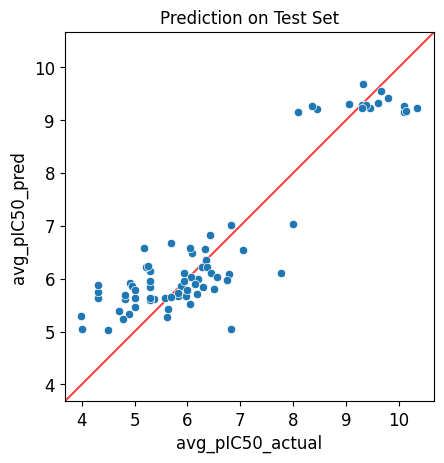

In [17]:
pp.plot_pred_vs_actual_from_df(pred_df, label='Prediction on Test Set');